In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [22]:
from sklearn.metrics import auc, average_precision_score, precision_recall_curve

def inspect_output_at(data_dir):
    assert os.path.exists(data_dir)

    # Plot training loss
    losses = np.load(os.path.join(data_dir, 'losses.npy'))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training loss')
    plt.show()

    # Plot histograms of r1 and r2 in scores_split on the same plot
    scores_split = np.load(os.path.join(data_dir, 'scores_split.npz'))
    plt.hist(scores_split['r1'], bins=100, alpha=0.5, label='T NEG', density=True)
    plt.hist(scores_split['r2'], bins=100, alpha=0.5, label='T POS', density=True)
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.title('Histogram of scores')
    plt.legend()
    plt.show()

    # logreg = torch.load(os.path.join(data_dir, 'regression.pt'))

    # Keys and shapes of metrics
    # AUROC ()
    # acc_list (375,)
    # acc_opt ()
    # thr_opt ()
    # fpr (375,)
    # tpr (375,)
    # thr (375,)
    # FPRs_4 (4,)
    # TPRs_lowFPR_interp (4,)
    # TPRs_lowFPR (4,)
    # FPR (1001,)
    # TPR (1001,)
    # Print AUROC
 
    metrics = np.load(os.path.join(data_dir, 'metrics.npy'), allow_pickle=True).item()
    print('AUROC:', metrics['AUROC'])
    # Print TPRs_lowFPR_interp
    print('TPRs_lowFPR_interp:', metrics['TPRs_lowFPR_interp'])
    # Print TPRs_lowFPR
    print('TPRs_lowFPR:', metrics['TPRs_lowFPR'])

    # Plot roc curve
    plt.plot(metrics['fpr'], metrics['tpr'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    y_score = np.concatenate([scores_split['r1'], scores_split['r2']])
    y_test = np.concatenate([np.zeros_like(scores_split['r1']), np.ones_like(scores_split['r2'])])
    average_precision = average_precision_score(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    auprc = auc(recall, precision)

    print('AUPRC:', auprc)

    # Plot P-R curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('P-R curve')
    plt.show()



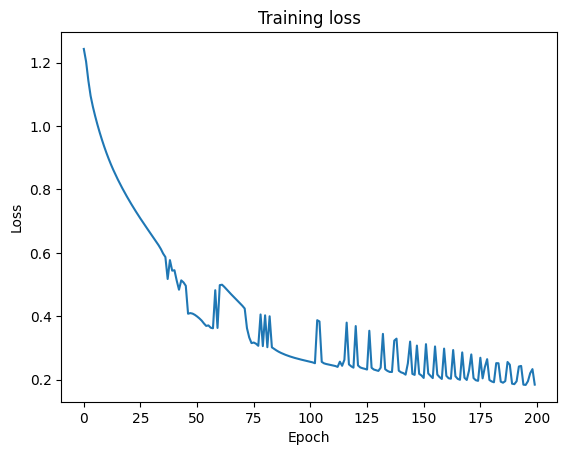

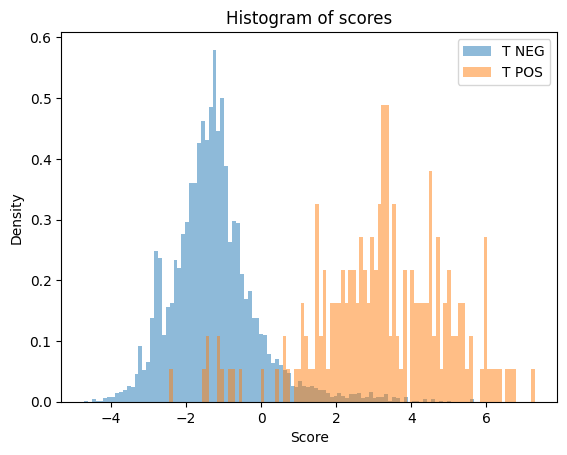

AUROC: 0.9670596153655808
TPRs_lowFPR_interp: [0.94708995 0.61375661 0.22222222 0.07407407]
TPRs_lowFPR: [0.94708995 0.61375661 0.22222222 0.07407407]


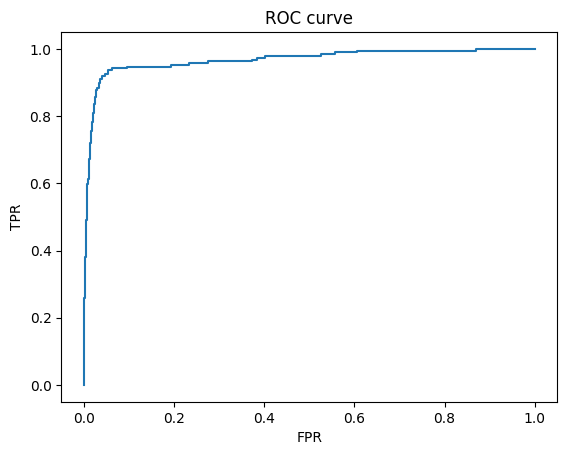

AUPRC: 0.7294246364146069


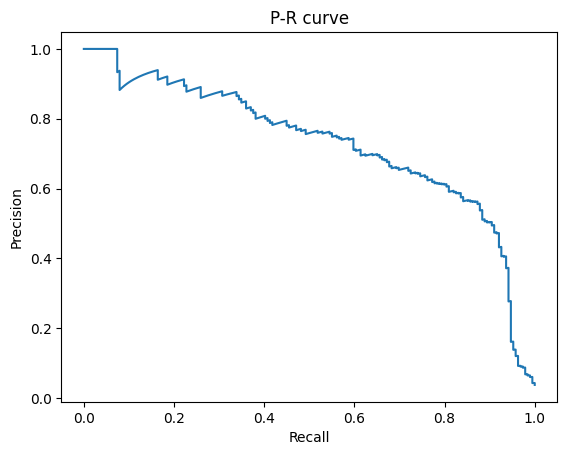

In [23]:
data_dir = "cache/llama-2"
inspect_output_at(data_dir)

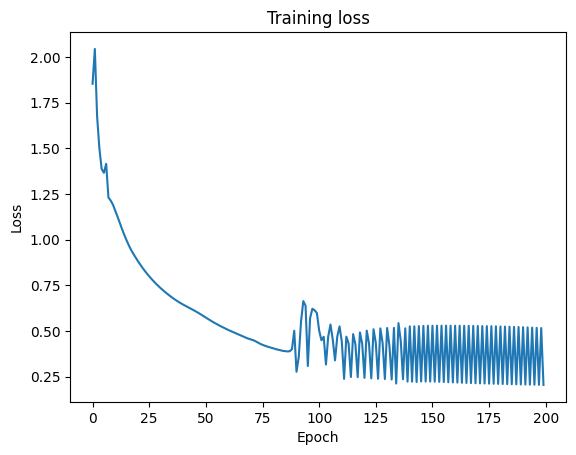

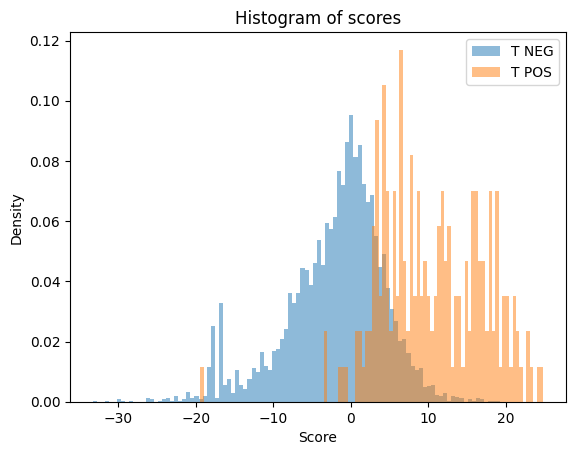

AUROC: 0.9296847968905451
TPRs_lowFPR_interp: [0.76165803 0.47150259 0.20725389 0.09326425]
TPRs_lowFPR: [0.76165803 0.47150259 0.20725389 0.09326425]


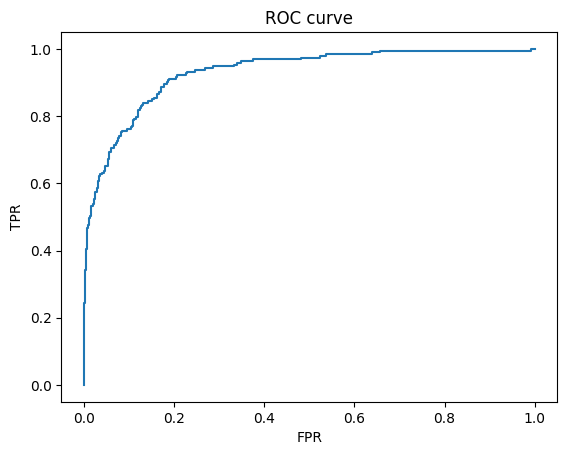

AUPRC: 0.5688961648623609


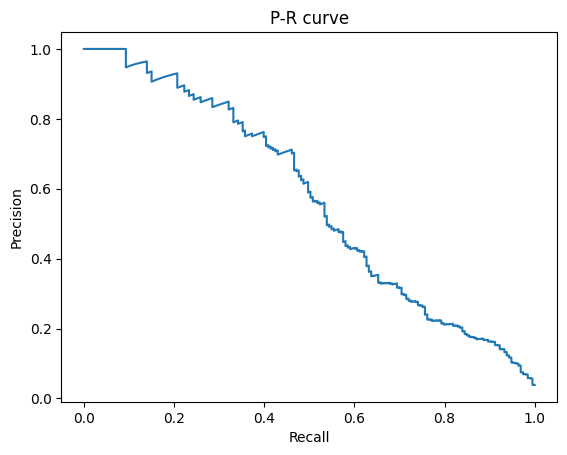

In [24]:
data_dir = "cache/llama-3"
inspect_output_at(data_dir)

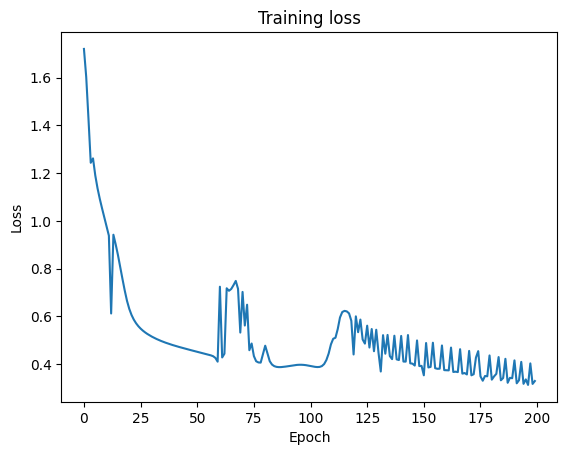

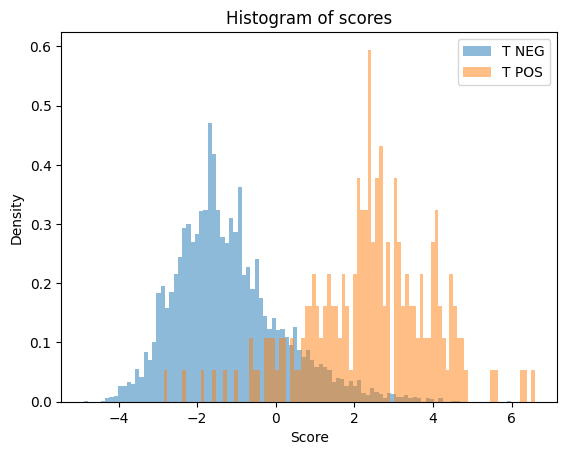

AUROC: 0.9461598752740064
TPRs_lowFPR_interp: [0.87244898 0.36734694 0.10204082 0.01530612]
TPRs_lowFPR: [0.87244898 0.36734694 0.10204082 0.01530612]


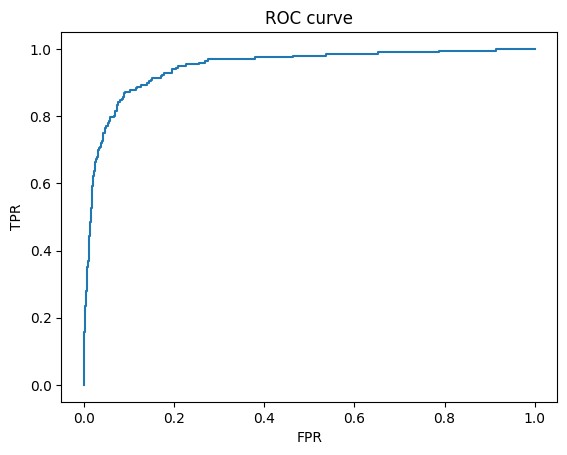

AUPRC: 0.5485518152584106


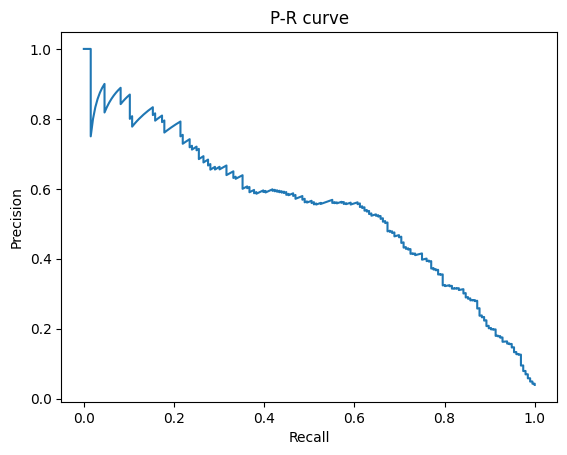

In [26]:
data_dir = "cache/mistral-7b"
inspect_output_at(data_dir)

In [12]:
losses = np.load(os.path.join(data_dir, 'losses.npy'))
metrics = np.load(os.path.join(data_dir, 'metrics.npy'), allow_pickle=True)
logreg = torch.load(os.path.join(data_dir, 'regression.pt'))
scores_split = np.load(os.path.join(data_dir, 'scores_split.npz'))

In [20]:
for k, v in metrics.item().items():
    print(k, v.shape)

AUROC ()
acc_list (375,)
acc_opt ()
thr_opt ()
fpr (375,)
tpr (375,)
thr (375,)
FPRs_4 (4,)
TPRs_lowFPR_interp (4,)
TPRs_lowFPR (4,)
FPR (1001,)
TPR (1001,)


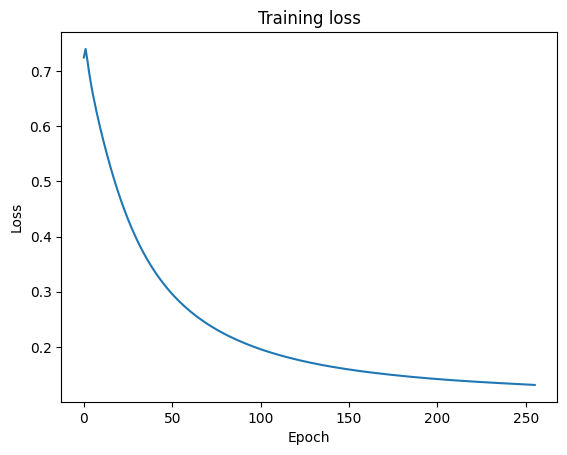

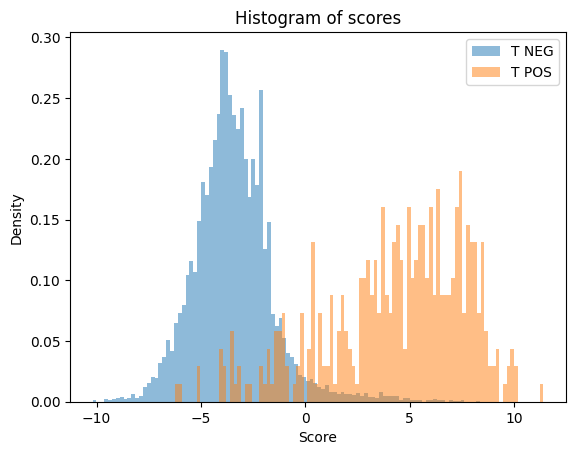

AUROC: 0.9601255518231077
TPRs_lowFPR_interp: [0.93041237 0.66752577 0.29381443 0.07474227]
TPRs_lowFPR: [0.93041237 0.66752577 0.29381443 0.07474227]


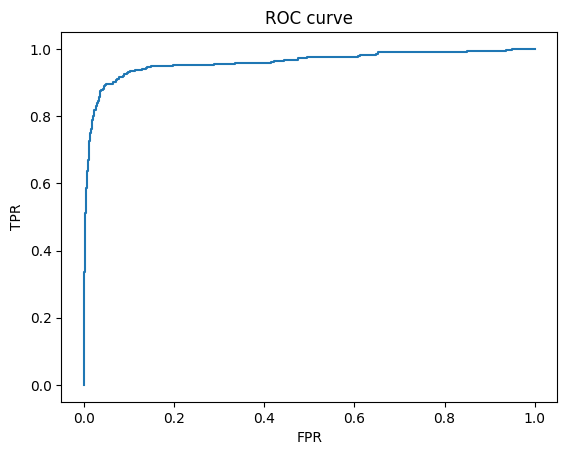

AUPRC: 0.7601645699877382


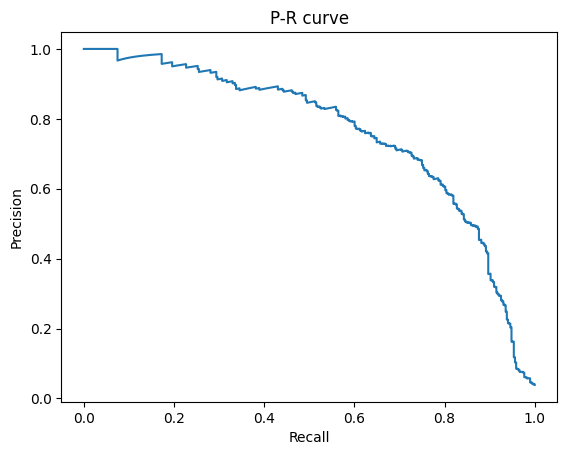

In [27]:
inspect_output_at('cache/llama-2/E256_B16_LR2.0e-04_L1R2.0e-04_TRN10000_TEST10000')

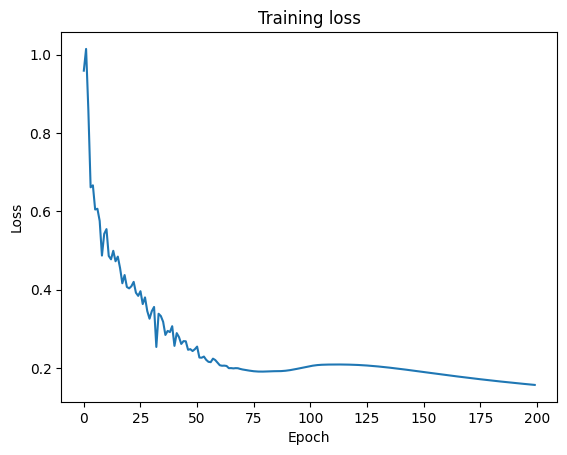

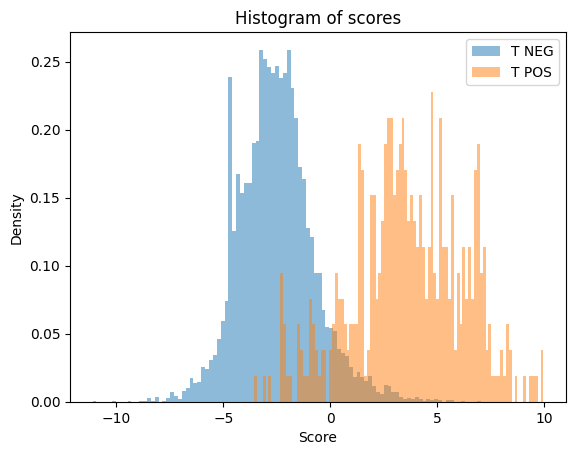

AUROC: 0.9683814936364364
TPRs_lowFPR_interp: [0.92051282 0.67179487 0.31282051 0.08717949]
TPRs_lowFPR: [0.92051282 0.67179487 0.31282051 0.08717949]


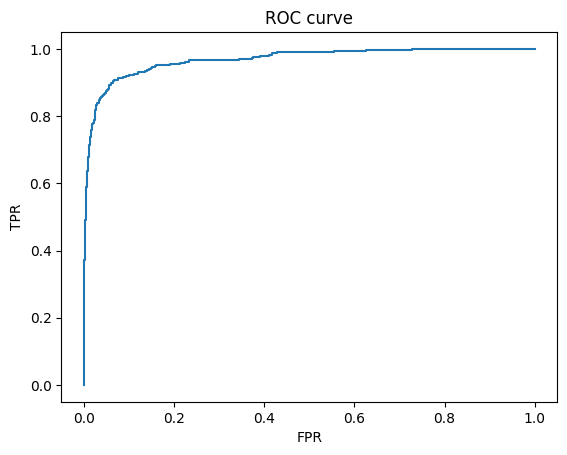

AUPRC: 0.7604423565542877


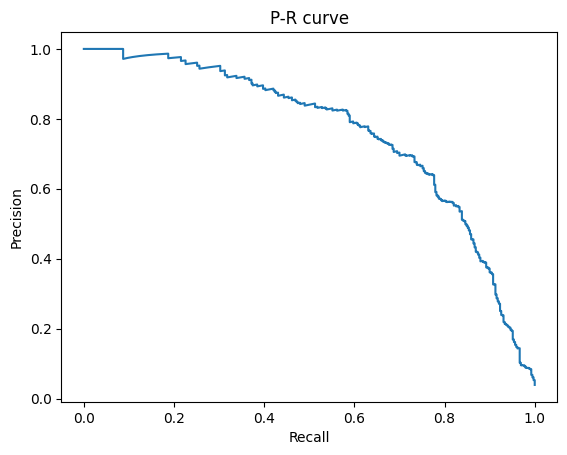

In [28]:
inspect_output_at('cache/llama-3/E200_B32_LR2.0e-04_L1R2.0e-04_TRN10000_TEST10000')

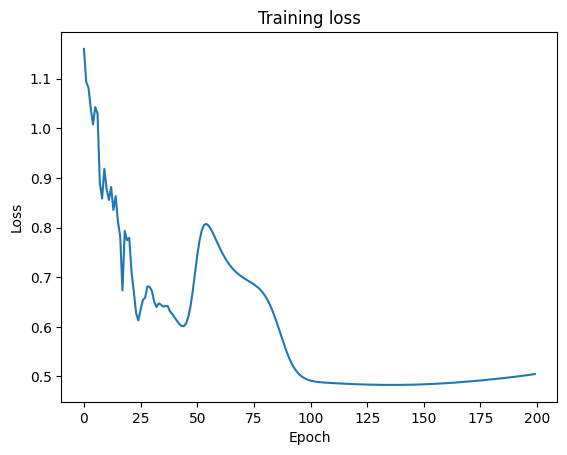

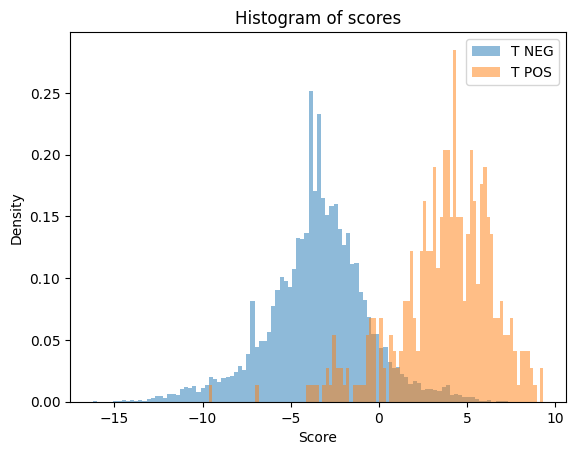

AUROC: 0.9592606803780498
TPRs_lowFPR_interp: [0.90721649 0.54381443 0.21649485 0.06701031]
TPRs_lowFPR: [0.90721649 0.54381443 0.21649485 0.06701031]


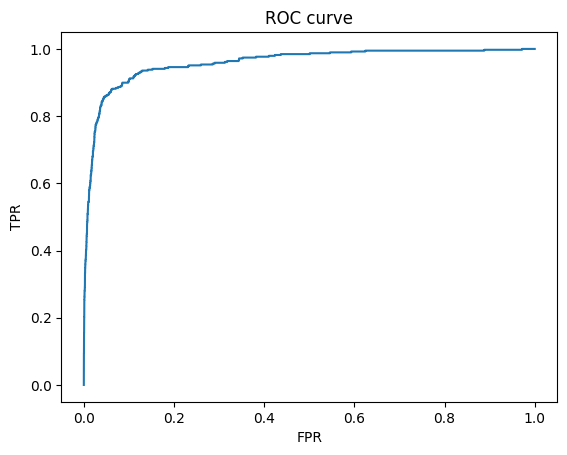

AUPRC: 0.6726365071679151


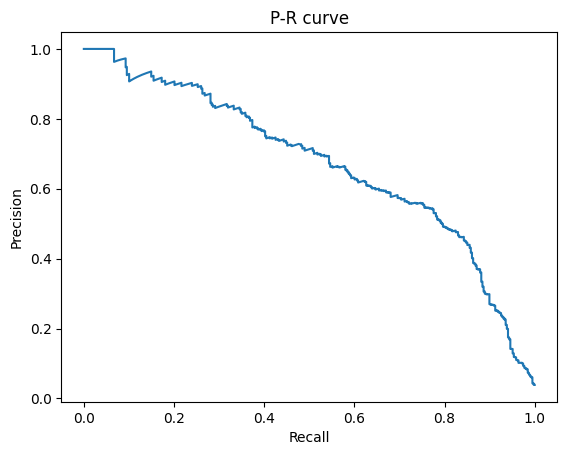

In [29]:
inspect_output_at('cache/mistral-7b/E200_B32_LR5.0e-04_L1R1.0e-03_TRN10000_TEST10000')

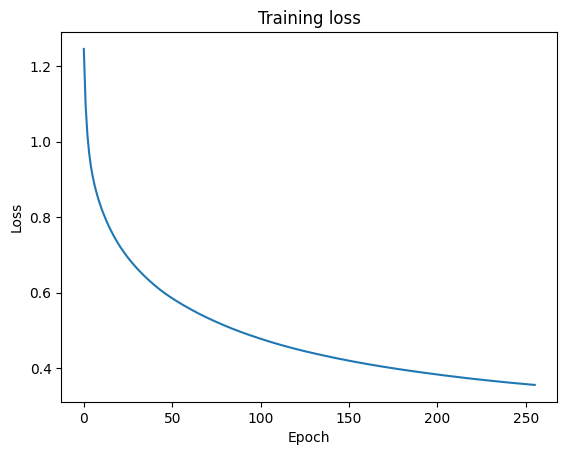

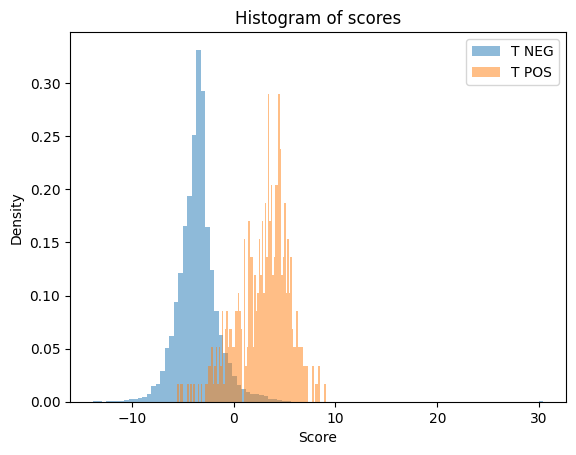

AUROC: 0.9690366152152345
TPRs_lowFPR_interp: [0.93781095 0.64427861 0.31840796 0.        ]
TPRs_lowFPR: [0.93781095 0.64427861 0.31840796 0.        ]


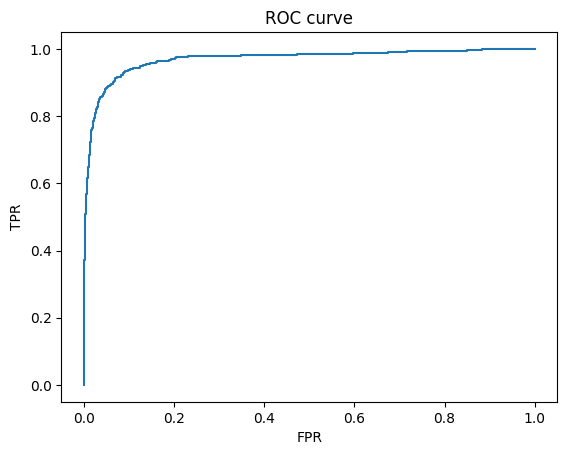

AUPRC: 0.7513285652448516


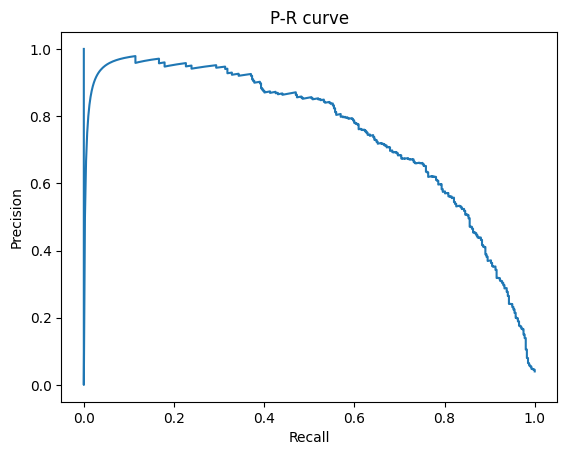

In [30]:
inspect_output_at('cache/flan-t5-xl/E256_B16_LR2.0e-04_L1R2.0e-04_TRN10000_TEST10000')

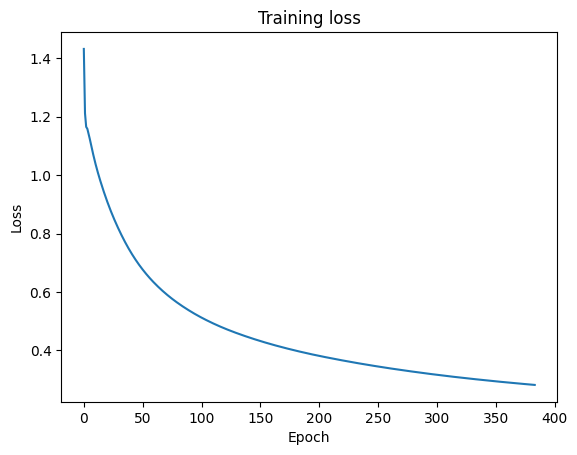

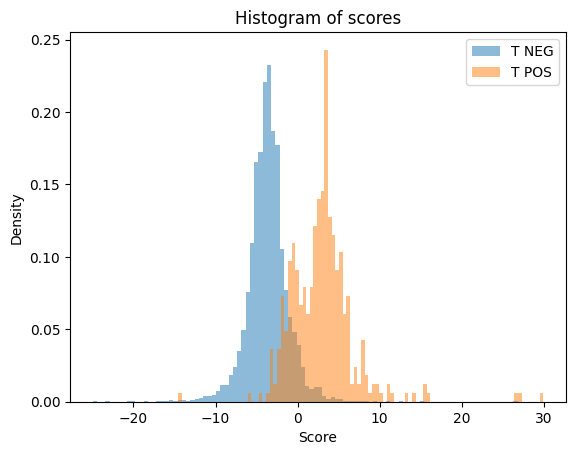

AUROC: 0.9535325980185794
TPRs_lowFPR_interp: [0.87837838 0.52432432 0.07297297 0.00540541]
TPRs_lowFPR: [0.87837838 0.52432432 0.07297297 0.00540541]


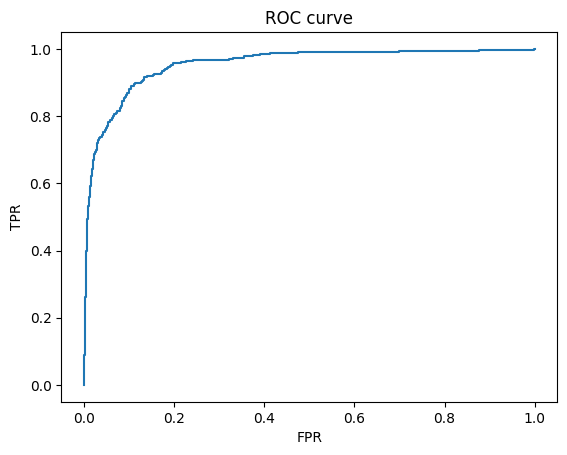

AUPRC: 0.56712923333816


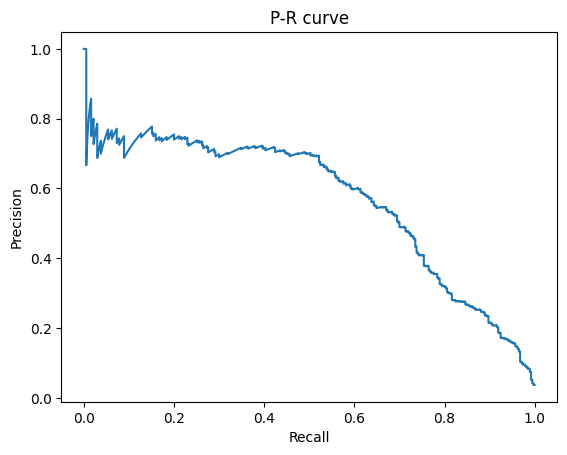

In [31]:
inspect_output_at('cache/gpt2/E384_B32_LR3.0e-04_L1R2.0e-04_TRN10000_TEST10000')